<div style="background-color: #30618C; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color: white; text-align: center; font-size: 180%; margin: 0;">Salary Range Prediction</h1>
  <span style="color: white;"></span>
</div>





<div style="background-color: #CAF6B8; padding: 10px; border: 2px solid #ddd; border-radius: 10px;">
  <h2 style="margin-top: 20px;">Problem:</h2>
  <p>Predict the average salary of job listings in New York City using the 'Jobs_NYC_Postings.csv' dataset. The dataset includes various attributes such as job title, company, location, and job description. By leveraging machine learning techniques, the goal is to develop a regression model that accurately estimates average salaries based on these features. This predictive model will provide valuable insights for job seekers and employers regarding salary expectations in NYC's job market.</p>
</div>
piv>



<div style="background-color: #4FB1DE; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color: black; text-align: center; font-size:180%; margin: 0;">Step 1 :- Import Libraries</h1>
  <span style="color: white;"></span>
</div>

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Scikit-learn (sklearn): Machine learning library in Python that provides tools for data mining and data analysis. StandardScaler is used for standardizing features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler


# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# train_test_split: Function from scikit-learn for splitting data into training and testing sets.
from sklearn.model_selection import train_test_split


#Evalaution Metrics'
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV


# Warnings: Python standard library for issuing warnings during runtime.
import warnings

warnings.filterwarnings("ignore")



<div style="background-color: #4FB1DE; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color:black;text-align: center; font-size:180%; margin: 0;">Step 2 :- Load The Data</h1>
  <span style="color: white;"></span>
</div>
er>


In [2]:
df=pd.read_csv('/content/Jobs_NYC_Postings.csv')

In [3]:
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024


In [4]:
df.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Classification', 'Title Code No', 'Level',
       'Job Category', 'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Salary Frequency',
       'Work Location', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')

<div style="background-color:#CAF6B8; border: 2px solid #ddd; padding: 10px;">
### Columns Description:

- **Job ID:** The unique identifier for each job opening.
- **Posting Type:** The type of posting (internal or external) for the job.
- **# of Positions:** The number of positions available for a particular opening.
- **Business Title:** The specific title of the position.
- **Civil Service Title:** The broader title classification for the position.
- **Title Code No:** The code associated with a particular job title.
- **Level:** The level of authority or seniority associated with the position.
- **Job Category:** Broad classification of where the job falls.
- **Full-time/Part-Time:** Indicates whether the job is full-time or part-time.
- **Salary Range From:** The starting salary for the job opening.
- **Salary Range To:** The maximum salary for the job opening.
- **Salary Frequency:** Indicates whether the salary is paid hourly or annually.
- **Work Location:** The location where the job will be performed.
- **Division/Work Unit:** Broad organizational unit for the job.
- **Job Description:** A brief description of the job responsibilities.
- **Minimum Qual Requirements:** The minimum qualifications required for the job.
- **Preferred Skills:** Skills that are preferred for the job.
- **Additional Information:** Any additional details provided with the job opening.
- **Hours/Shift:** The work hours or shift schedule for the job.
- **Work Location 1:** Additional information about the work location.
- **Recruitment Contact:** Empty field, supposed to contain contact information.
- **Residency Requirement:** Specifies whether residency in NYC is required.
- **Posting Date:** The date when the job opening was announced.
- **Post Until:** The closing date for applications.
- **Posting Updated:** The date when the posting was last updated.
- **Process Date:** The date when the posting process was completed.
</div>


In [5]:
df.nunique()

,0
Job ID,2626
Agency,59
Posting Type,2
# Of Positions,35
Business Title,1781
Civil Service Title,365
Title Classification,5
Title Code No,388
Level,18
Job Category,183


In [6]:
df.isnull().sum()

,0
Job ID,0
Agency,0
Posting Type,0
# Of Positions,0
Business Title,0
Civil Service Title,0
Title Classification,0
Title Code No,0
Level,0
Job Category,0


<div style="background-color:#CAF6B8; border: 2px solid #ddd; border-radius: 5px; padding: 10px;">

### Explanation of Missing Values in Dataset

- **Full-Time/Part-Time Indicator (117 missing values):**
  - These missing values indicate that some job postings do not specify whether they are full-time or part-time roles. This could be due to oversight during data entry or the nature of the position being flexible.

- **Minimum Qual Requirements (43 missing values):**
  - Missing values in this column suggest that some job postings might not have explicitly listed minimum qualifications. This could vary based on the job type or the level of detail provided by the posting agency.

- **Preferred Skills (1219 missing values):**
  - Missing values here indicate that many job postings did not specify preferred skills or qualifications. This might reflect variations in how much detail different agencies provide about job requirements.

- **Additional Information (1862 missing values):**
  - The absence of information in this column suggests that many job postings did not include additional details beyond the basic job description. This could be due to the posting agency's policies or the type of information deemed necessary for the role.

- **To Apply (426 missing values):**
  - Missing values in this column indicate that some job postings did not provide specific instructions on how to apply for the position. This information is crucial for potential applicants to know how to proceed with their applications.

- **Hours/Shift (3210 missing values):**
  - Missing values in this column suggest that details about work hours or shifts were not specified for a significant number of job postings. This information is important for candidates considering the role's compatibility with their schedule.

- **Work Location 1 (3229 missing values):**
  - The absence of information here indicates that additional details about the work location beyond the primary location were not provided for many job postings. This could include remote work options or specific departmental locations.

- **Recruitment Contact (5120 missing values):**
  - Missing values in this field mean that contact information for recruitment purposes was not provided for many job postings. This could impact potential applicants' ability to reach out for clarification or assistance during the application process.

- **Post Until (3616 missing values):**
  - Missing values here suggest that specific end dates for applications were not specified for many job postings. This information is crucial for applicants to know the deadline by which they must submit their applications.

</div>


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5120 non-null   int64  
 1   Agency                         5120 non-null   object 
 2   Posting Type                   5120 non-null   object 
 3   # Of Positions                 5120 non-null   int64  
 4   Business Title                 5120 non-null   object 
 5   Civil Service Title            5120 non-null   object 
 6   Title Classification           5120 non-null   object 
 7   Title Code No                  5120 non-null   object 
 8   Level                          5120 non-null   object 
 9   Job Category                   5120 non-null   object 
 10  Full-Time/Part-Time indicator  5003 non-null   object 
 11  Career Level                   5120 non-null   object 
 12  Salary Range From              5120 non-null   f

<div style="background-color: #4FB1DE; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color:black;text-align: center; font-size:180%; margin: 0;">Step 3 :- Preparing the Data</h1>
  <span style="color: white;"></span>
</div>


<div style="background-color: #CAF6B8; padding: 10px; border: 2px solid #ddd; border-radius: 10px;">
  <h2 style="margin-top: 20px;">Data</h2>
  <ul>
    <li>Handling the missing values</li>
    <li>Encoding the categorical values</li>
    <li>Scale the numerical features</li>
  </ul>
</div>


In [8]:
#Handling the mising values:

#show the unnessery columns

df[['Job Category','Hours/Shift','Work Location 1','Civil Service Title','Title Code No',
    'Title Classification','Division/Work Unit','Job Description','Minimum Qual Requirements',
    'Preferred Skills','Additional Information','To Apply','Recruitment Contact','Residency Requirement','Post Until']].head()

,Job Category,Hours/Shift,Work Location 1,Civil Service Title,Title Code No,Title Classification,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Recruitment Contact,Residency Requirement,Post Until
0,Constituent Services & Community Programs Heal...,NaN,NaN,CITY RESEARCH SCIENTIST,21744,Non-Competitive-5,"Maternal, Infant, & Repr. Hlth","Established in 1805, the New York City Departm...","1. For Assignment Level I (only physical, bio...",Experience in quantitative research methods an...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,New York City residency is generally required ...,22-MAY-2024
1,"Policy, Research & Analysis Public Safety, Ins...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",ADMINISTRATIVE PROJECT MANAGER,8300B,Competitive-1,Pub Bldgs/Transportation,Hours: Full-Time â 35 Hours Work Location: 3...,1. A baccalaureate degree from an accredited c...,Candidates must have excellent management skil...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",NaN,New York City Residency is not required for th...,NaN
2,"Engineering, Architecture, & Planning",NaN,NaN,ADMINISTRATIVE PROJECT MANAGER,8300B,Competitive-1,PUB BLDGS/CPD/Library/Brooklyn,Hours: Full-Time â 35 Hours Work Location: 3...,1. A baccalaureate degree from an accredited c...,Candidates should have at least six years of e...,NaN,NaN,NaN,New York City Residency is not required for th...,NaN
3,"Finance, Accounting, & Procurement",9:00am â 5:00pm,To be determine.,PROCUREMENT ANALYST,12158,Competitive-1,Bridge Repair/352 Kent St,Reporting directly to the Director of Bridge R...,1. A baccalaureate degree from an accredited c...,Familiar with and knowledge of Procurement sys...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,NaN,New York City residency is generally required ...,NaN
4,Constituent Services & Community Programs Heal...,NaN,NaN,CITY RESEARCH SCIENTIST,21744,Non-Competitive-5,Dis-Div. Mgmt. & Sys Coord,"Established in 1805, the New York City Departm...","1. For Assignment Level I (only physical, bio...",At least five yearsâ work experience in the ...,NaN,Apply online with a cover letter to https://a1...,NaN,New York City residency is generally required ...,05-JUN-2024


In [9]:
# drop the unnessery columns

col=['Job Category','Hours/Shift','Work Location 1','Civil Service Title','Title Code No',
    'Title Classification','Division/Work Unit','Job Description','Minimum Qual Requirements',
    'Preferred Skills','Additional Information',
     'To Apply','Recruitment Contact','Residency Requirement','Post Until']
df.drop(columns=col, inplace=True)
df.head()


,Job ID,Agency,Posting Type,# Of Positions,Business Title,Level,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Work Location,Posting Date,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",02,F,Experienced (non-manager),82506.0,94882.0,Annual,42-09 28th Street,01/23/2024,01/23/2024,03/04/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,00,F,Experienced (non-manager),58682.0,134570.0,Annual,30-30 Thomson Ave L I City Qns,10/03/2023,11/29/2023,03/04/2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,00,F,Experienced (non-manager),58682.0,91405.0,Annual,30-30 Thomson Ave L I City Qns,02/01/2024,02/01/2024,03/04/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,02,F,Experienced (non-manager),50972.0,82730.0,Annual,55 Water St Ny Ny,04/04/2023,04/04/2023,03/04/2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",03,F,Experienced (non-manager),92301.0,106146.0,Annual,42-09 28th Street,02/06/2024,02/21/2024,03/04/2024


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5120 non-null   int64  
 1   Agency                         5120 non-null   object 
 2   Posting Type                   5120 non-null   object 
 3   # Of Positions                 5120 non-null   int64  
 4   Business Title                 5120 non-null   object 
 5   Level                          5120 non-null   object 
 6   Full-Time/Part-Time indicator  5003 non-null   object 
 7   Career Level                   5120 non-null   object 
 8   Salary Range From              5120 non-null   float64
 9   Salary Range To                5120 non-null   float64
 10  Salary Frequency               5120 non-null   object 
 11  Work Location                  5120 non-null   object 
 12  Posting Date                   5120 non-null   o

In [11]:
#removung the missing values in a particular rows
df.dropna(subset=['Full-Time/Part-Time indicator'],inplace=True)

In [12]:
#now checking the missing values
df.isnull().sum()

,0
Job ID,0
Agency,0
Posting Type,0
# Of Positions,0
Business Title,0
Level,0
Full-Time/Part-Time indicator,0
Career Level,0
Salary Range From,0
Salary Range To,0


#Now, in my dataset, there are no NaN or missing values, and there are no unnecessary columns.


In [13]:
#Rename the particular columns
df.rename(columns={'# Of Positions':'Number of Positions'},inplace=True)

In [14]:
# finding the catergorical value
df.select_dtypes(include=['object']).columns.tolist()

['Agency',
 'Posting Type',
 'Business Title',
 'Level',
 'Full-Time/Part-Time indicator',
 'Career Level',
 'Salary Frequency',
 'Work Location',
 'Posting Date',
 'Posting Updated',
 'Process Date']

In [15]:
#count the total number of catagorical values
df_columns=df.select_dtypes(include=['object']).columns.tolist()
len(df_columns)

11

In [16]:
#to finding the numerical values
df.select_dtypes(include=['int','float']).columns.tolist()

['Job ID', 'Number of Positions', 'Salary Range From', 'Salary Range To']

In [17]:
#count total number of  numerical values
df_numerical=df.select_dtypes(include=['int','float']).columns.tolist()
len(df_numerical)

4


 <div style="background-color: #CAF6B8; padding: 10px; border: 2px solid #ddd; border-radius: 10px;">
  <h2 style="margin-top: 20px;">Conclusion: Dataset Composition</h2>
  <p>In this dataset, we have identified a total of 11 categorical columns and 4 numerical columns.</p>
  
  <h4>Categorical Values:</h4>
  <p>Categorical columns in the dataset represent qualitative variables that typically take on a limited number of distinct categories or labels. These columns are used to categorize data based on attributes or characteristics.</p>
  <ul>
    <li>Job ID</li>
    <li>Agency</li>
    <li>Posting Type</li>
    <li>Business Title</li>
    <li>Civil Service Title</li>
    <li>Title Classification</li>
    <li>Job Category</li>
    <li>Full-Time/Part-Time Indicator</li>
    <li>Career Level</li>
    <li>Salary Frequency</li>
    <li>Residency Requirement</li>
  </ul>
  
  <h4>Numerical Values:</h4>
  <p>Numerical columns in the dataset represent quantitative variables that are measured on a numeric scale. These columns typically contain numerical data that can be subjected to mathematical operations.</p>
  <ul>
    <li>Number of Positions</li>
    <li>Title Code No</li>
    <li>Salary Range From</li>
    <li>Salary Range To</li>
  </ul>
</div>
e To
ge From
- Salary Range To


In [18]:
categorical_col=df_columns=df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_col:
    total_values=df[col].notna().sum()
    total_null=df[col].isna().sum()
    print(total_values,
              total_null)

5003 0
5003 0
5003 0
5003 0
5003 0
5003 0
5003 0
5003 0
5003 0
5003 0
5003 0


<div style="background-color: #CAF6B8; padding: 10px; border: 2px solid #ddd; border-radius: 10px;">
  <h2 style="margin-top: 20px;">Checking the Data Types of Each Column</h2>
</div>


In [19]:
 df.dtypes

,0
Job ID,int64
Agency,object
Posting Type,object
Number of Positions,int64
Business Title,object
Level,object
Full-Time/Part-Time indicator,object
Career Level,object
Salary Range From,float64
Salary Range To,float64


### Checking for outliers :
##We will use Box Plot to see the outliers

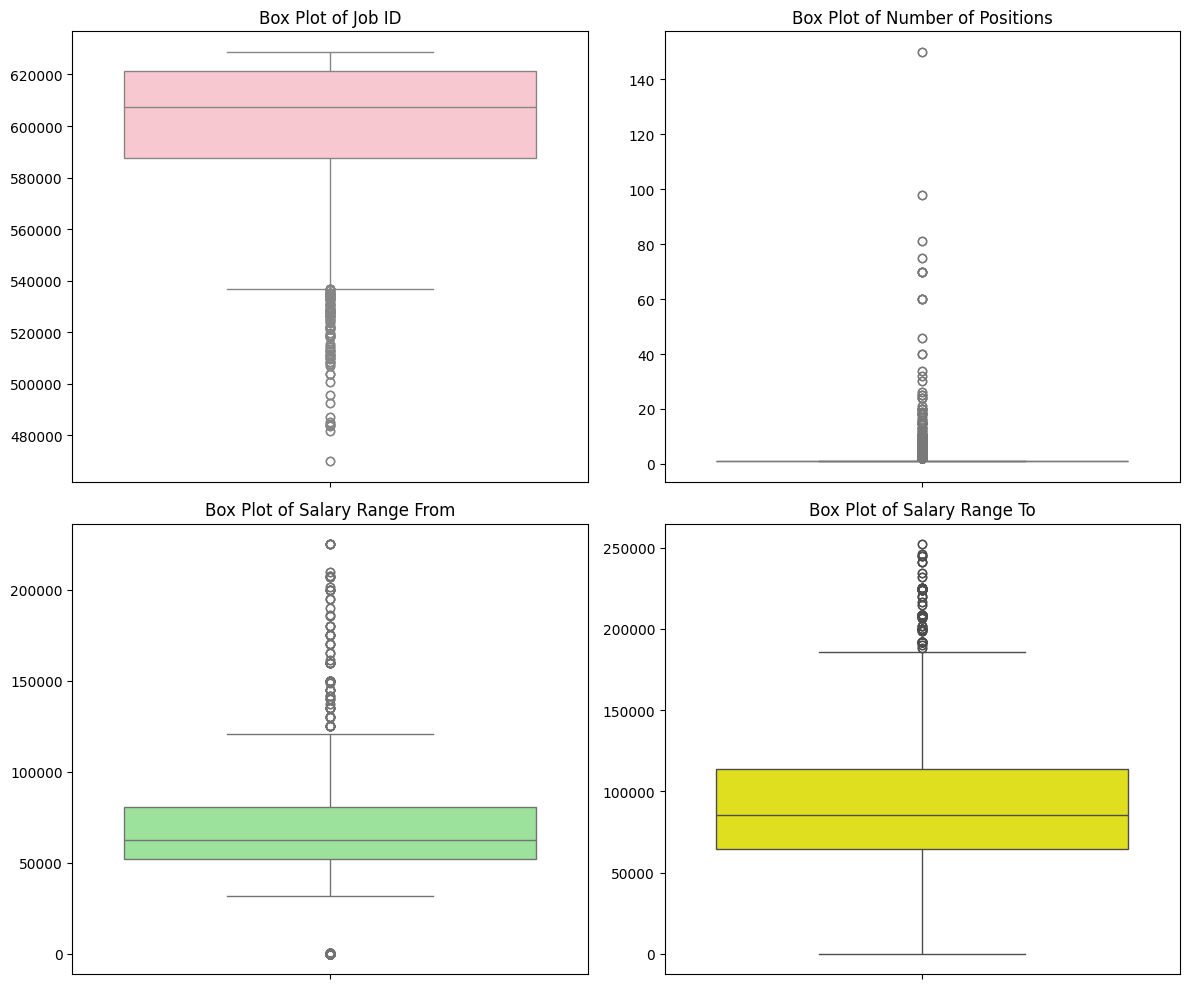

In [20]:



# Identify numerical columns (replace with actual numerical columns from your dataset)
numerical_col=df.select_dtypes(include=['int', 'float']).columns


# Calculating the number of rows needed for the figure
num_rows = (len(numerical_col) + 2 - 1) // 2

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5*num_rows))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

# Define custom color palette
custom_palette = ['pink', 'lightblue', 'lightgreen', 'yellow', 'lightcoral', 'lightcyan'] * (len(numerical_col) // 6 + 1) # Example custom colors

# Loop over each numerical column
for i, col in enumerate(numerical_col):
    # Create a horizontal box plot for each numerical column
    sns.boxplot(data=df, y=col, ax=axes[i], color=custom_palette[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')

# Adjust layout
plt.tight_layout()
plt.show()


<div style="background-color: #4FB1DE; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color:black;text-align: center; font-size:180%; margin: 0;">Step 4 :-Distribution of the Dataset </h1>
  <span style="color: white;"></span>
</div>
>
nter>


<div style="background-color: #CAF6B8; padding: 10px; border: 2px solid #ddd; border-radius: 10px;">
  <h3>Distribution of the Dataset</h3>
  
  <p>To visualize the distribution of the dataset, we can use histograms.</p>
  
  <h4>Categorical Variables</h4>
  
  <p>For categorical variables such as Job Category, Agency, and others, bar plots or frequency tables are typically used to visualize their distribution across the dataset.</p>
  
  <p>These visualizations provide insights into how data points are distributed across different attributes within the dataset, aiding in understanding the overall characteristics and patterns present.</p>
</div>
.


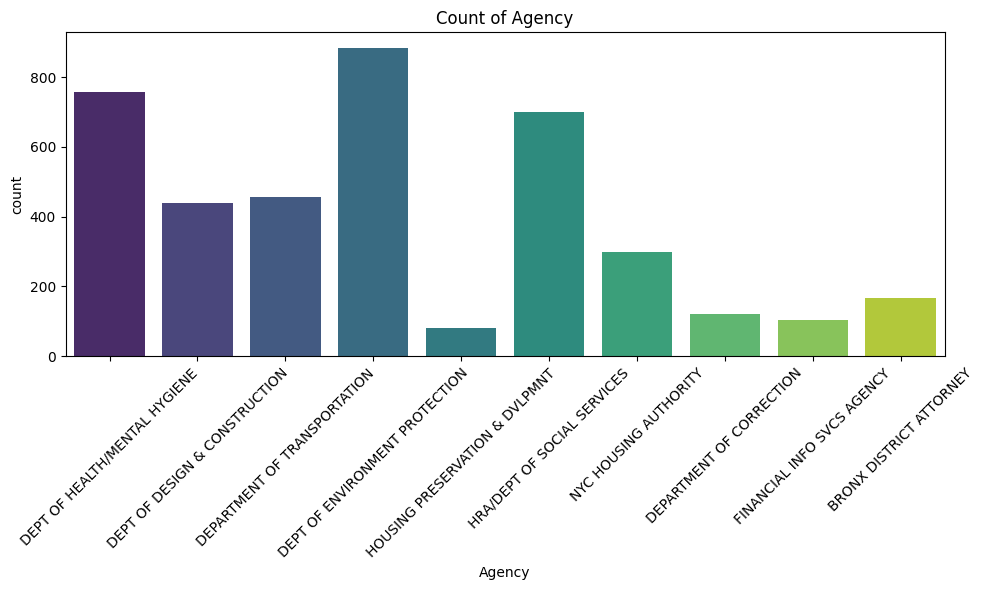

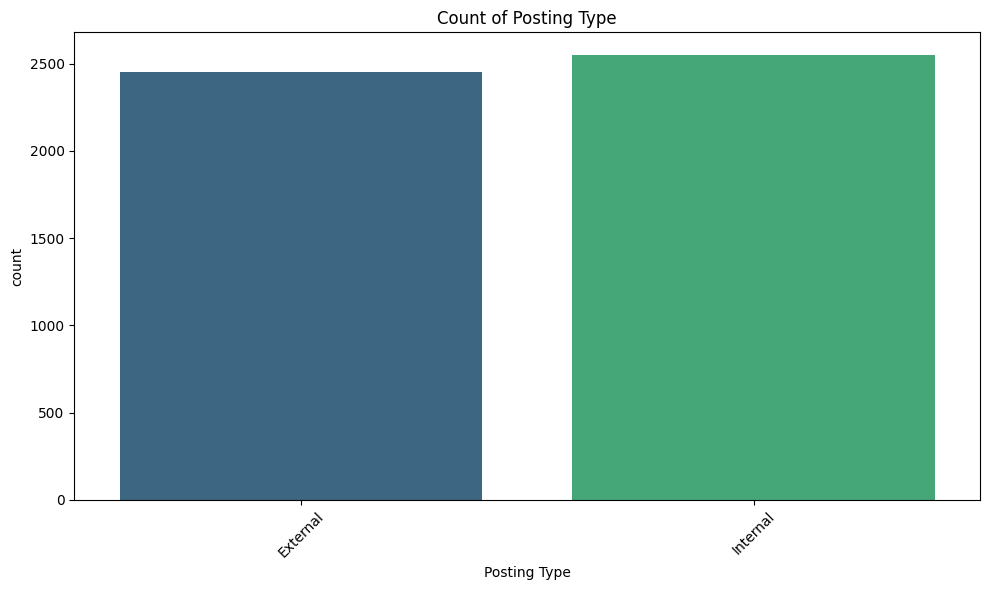

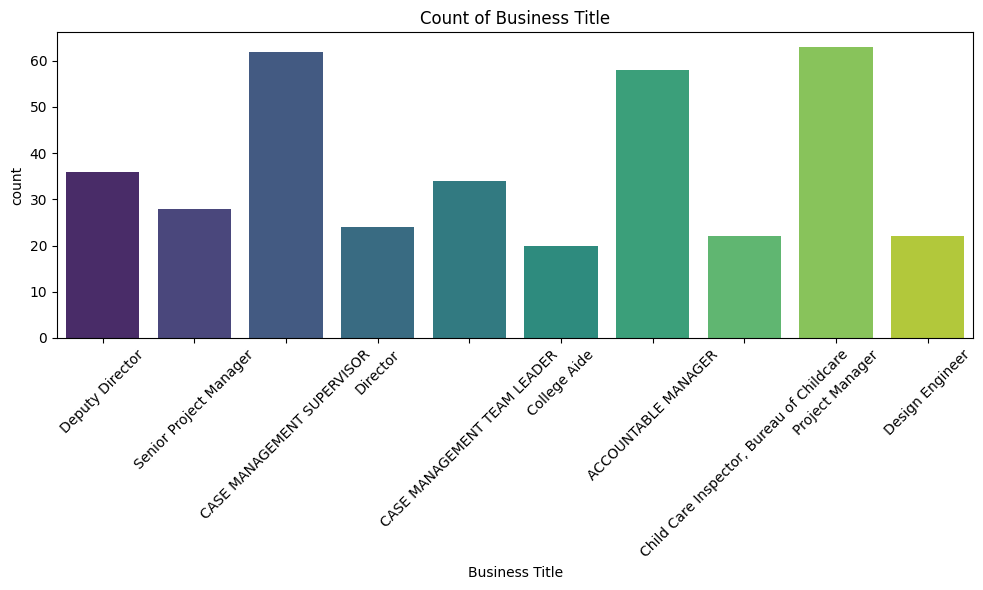

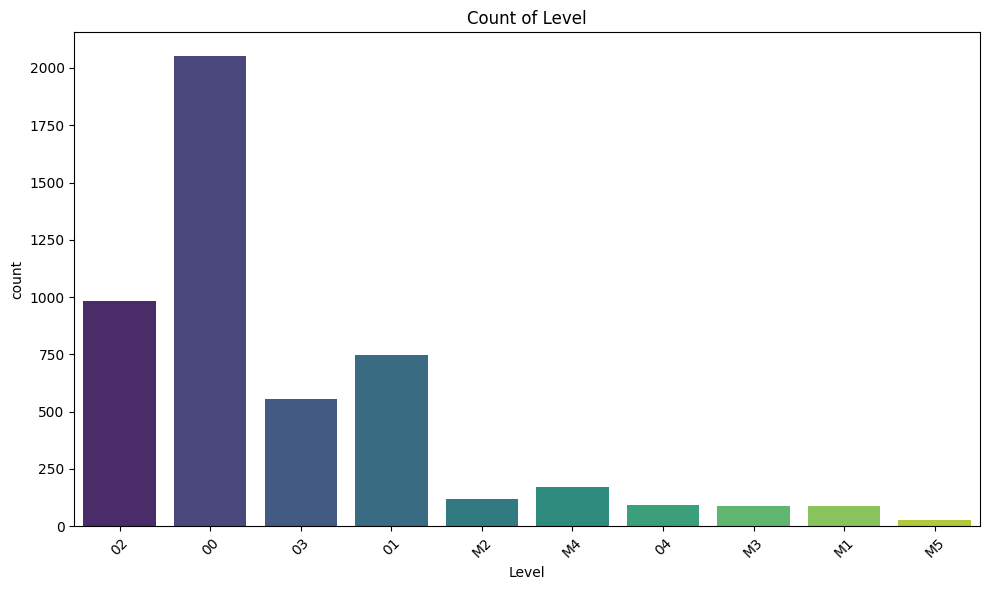

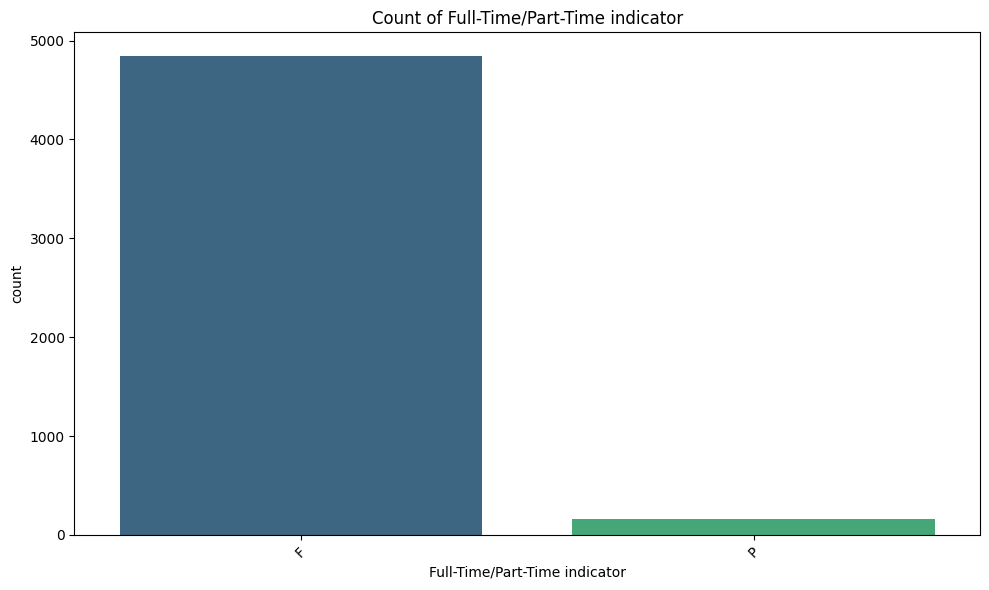

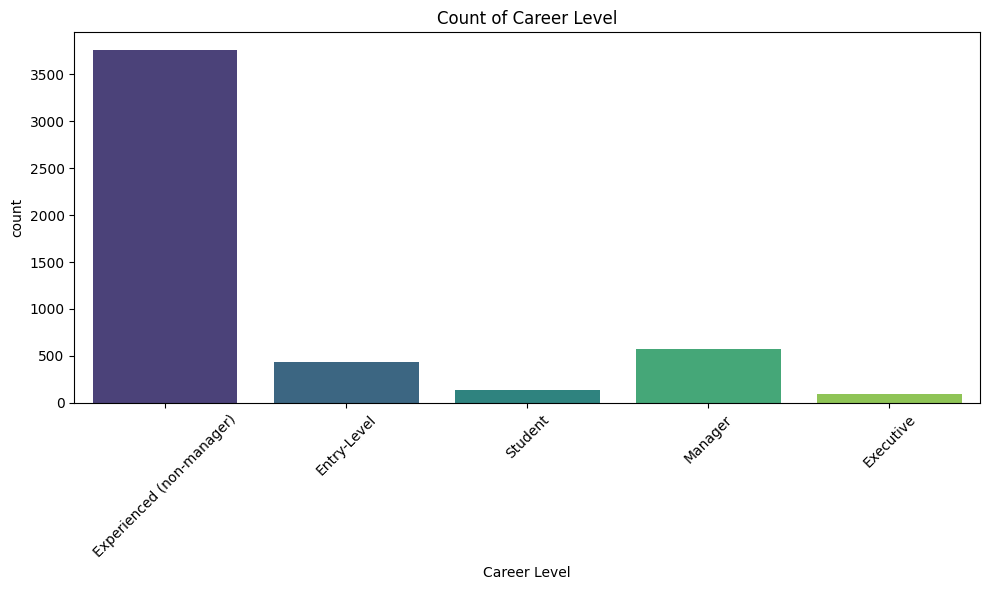

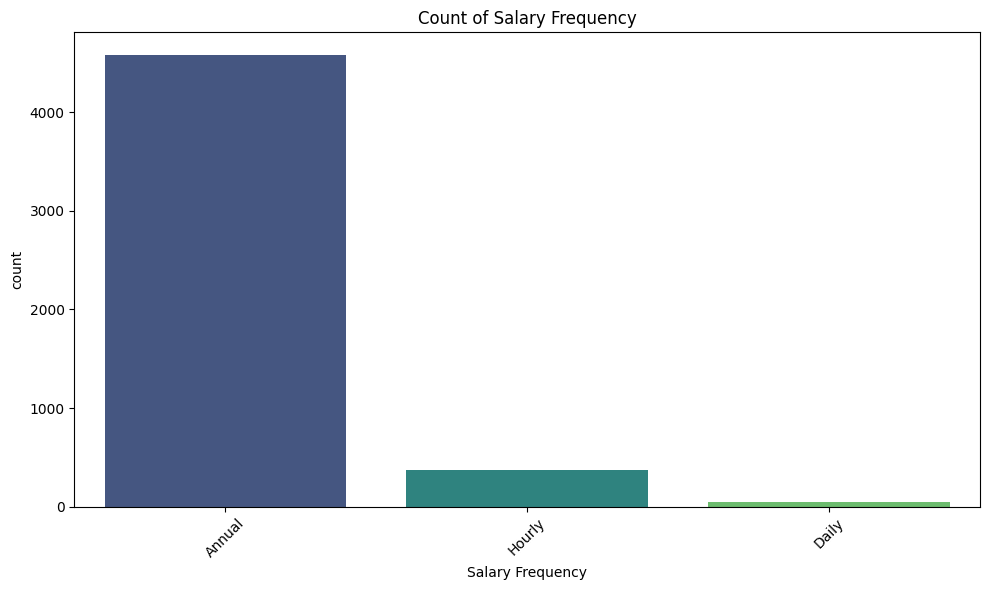

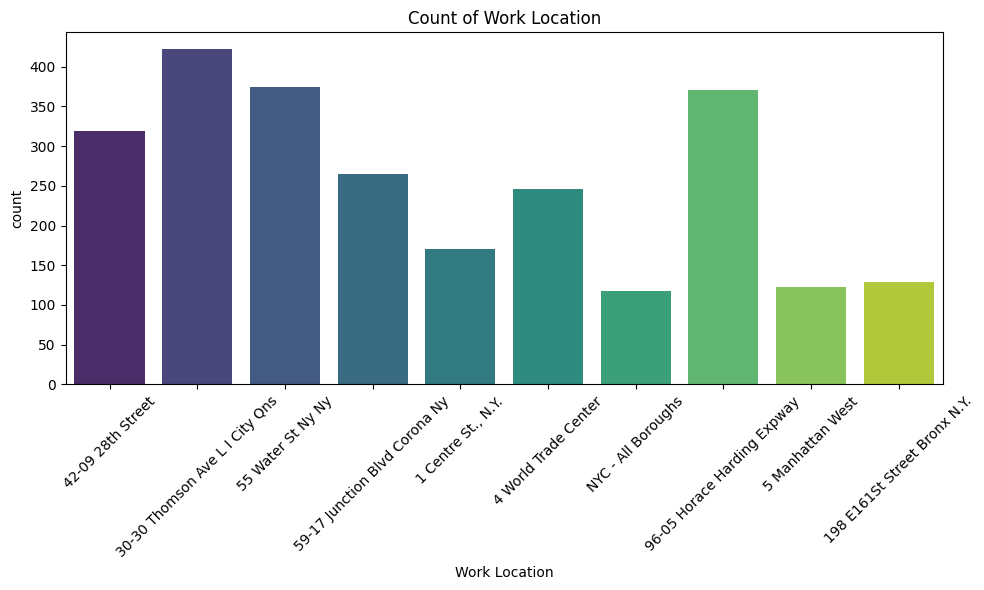

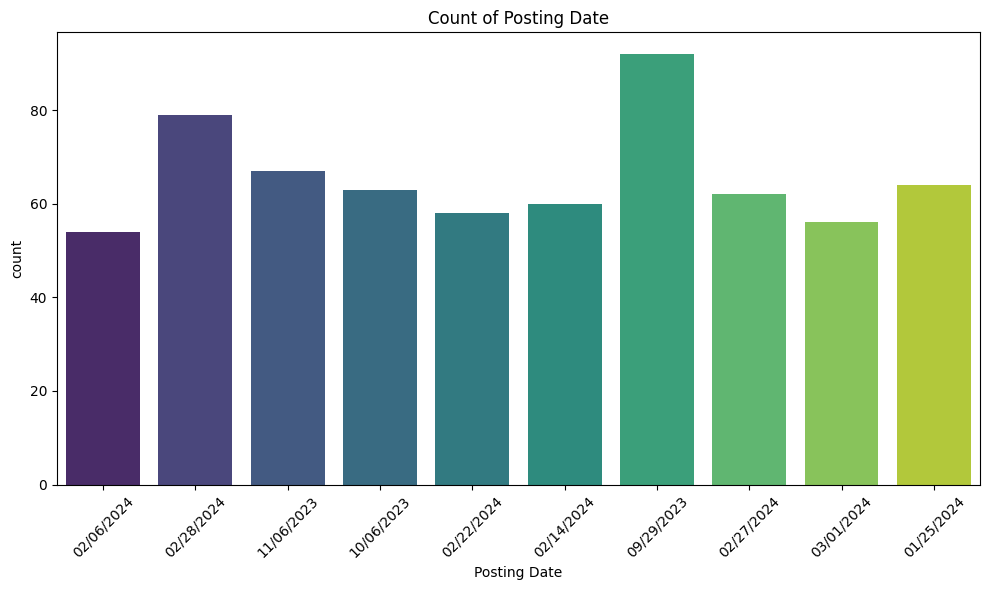

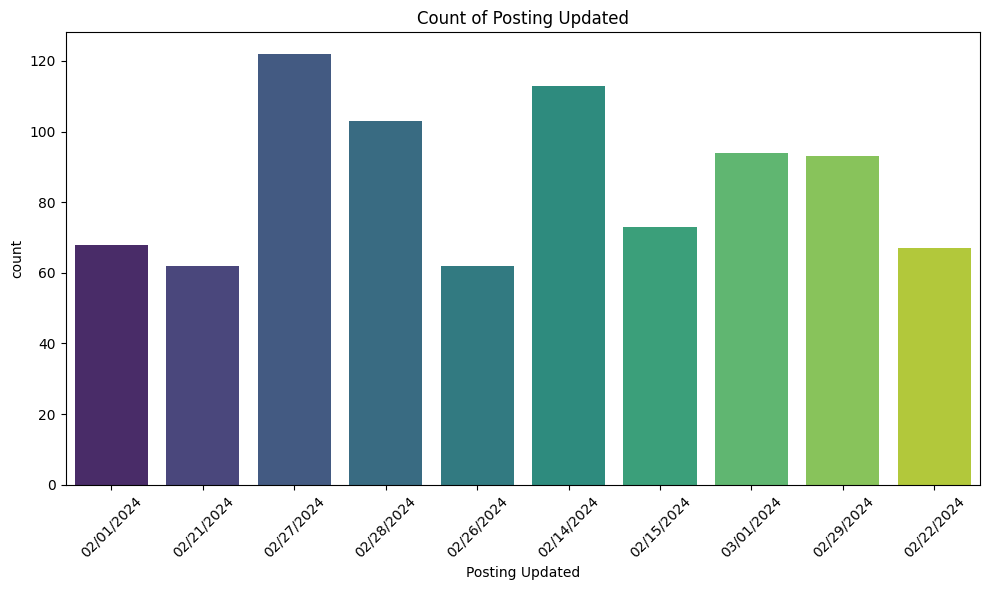

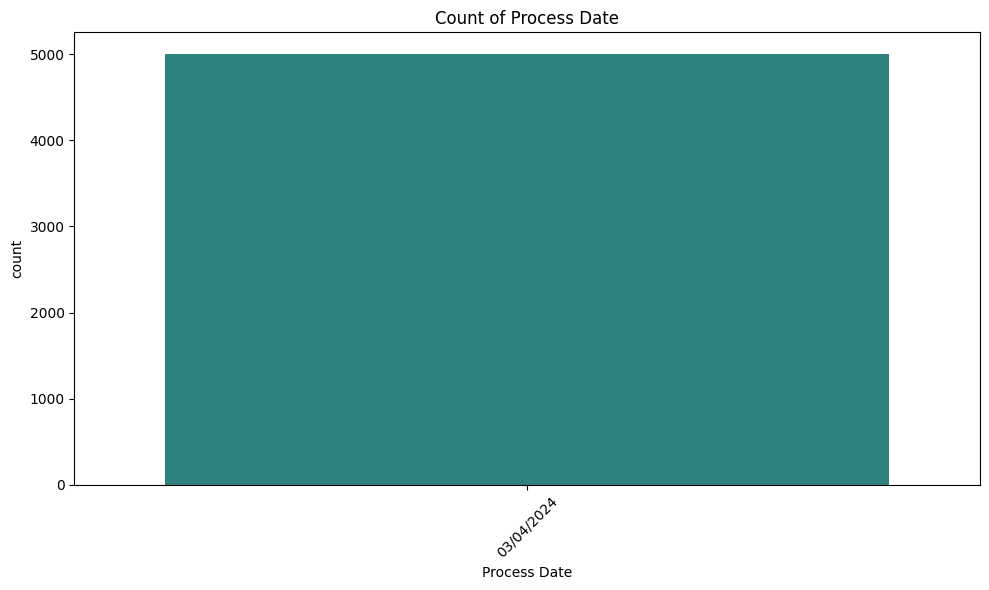

In [21]:
### distrubution of the datasets
categorical_columns=df.select_dtypes(include=['object']).columns.tolist()

# Set a threshold for how many top values to plot
top_n = 10  # Adjust this number based on your dataset and visualization needs

# Plot each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    top_values = df[col].value_counts().nlargest(top_n).index
    sns.countplot(x=col, data=df[df[col].isin(top_values)], palette='viridis')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

###

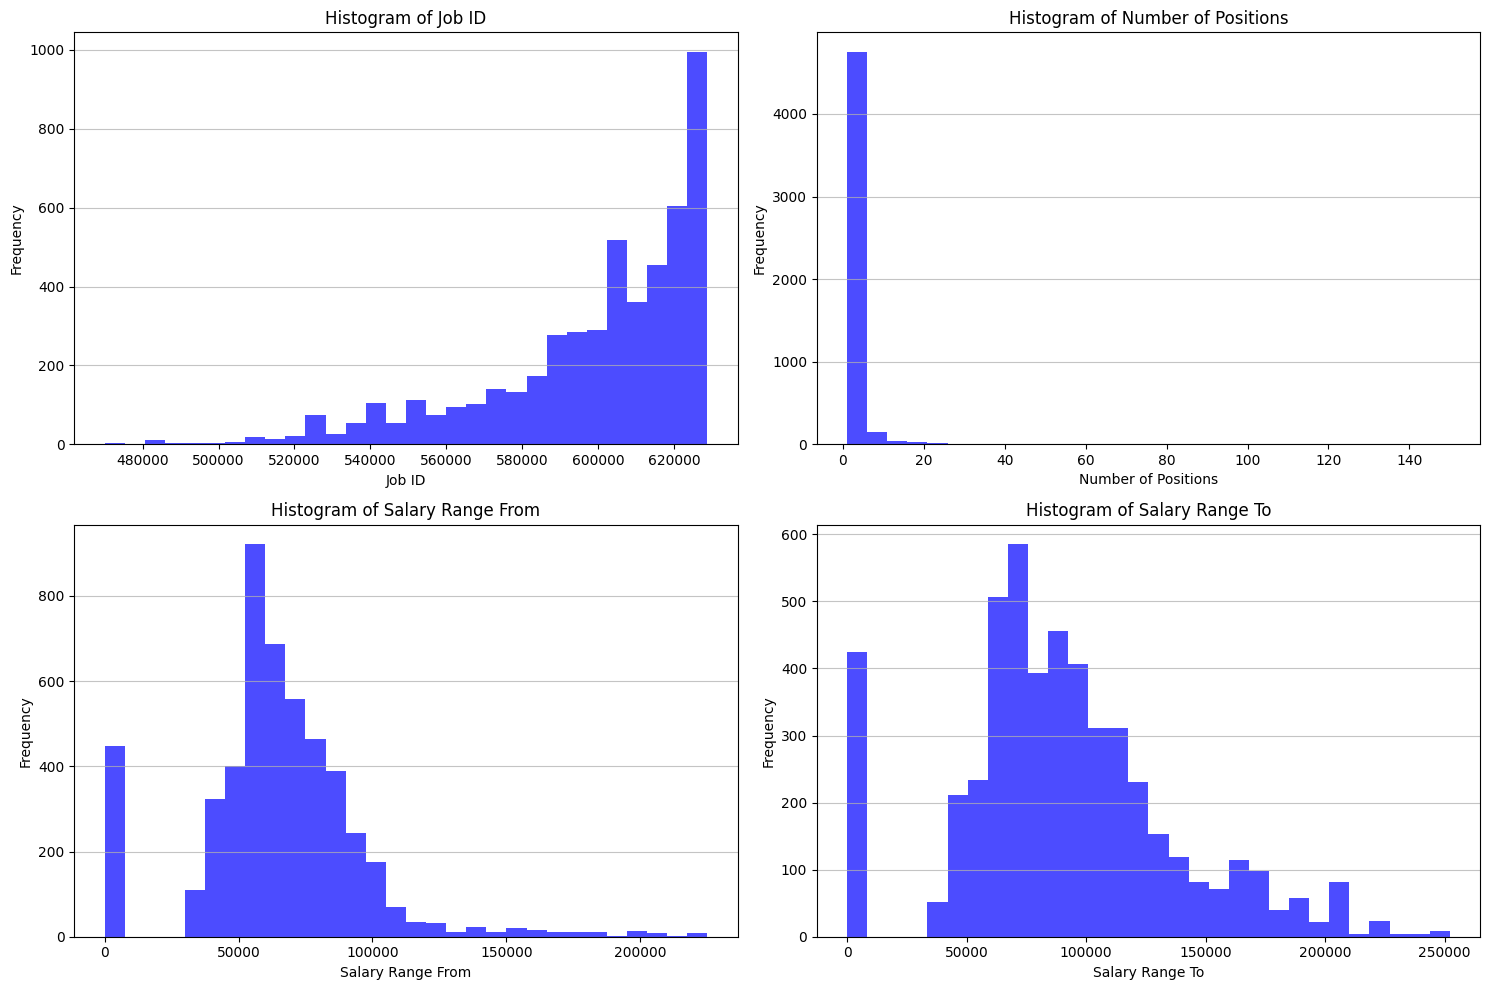

In [22]:
### Identify numerical columns
df_numerical=df.select_dtypes(include=['int','float']).columns.tolist()
# Calculate the number of rows and columns for subplots
num_cols = 2  # Number of columns in the subplot grid
num_rows = (len(df_numerical) + num_cols - 1) // num_cols  # Number of rows

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(df_numerical):
    ax = axes[i]
    ax.hist(df[col], bins=30, color='blue', alpha=0.7)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', alpha=0.75)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

<div style="background-color: #CAF6B8; padding: 10px; border: 2px solid #ddd; border-radius: 10px;">
  <h3>Numerical Variables</h3>
  
  <h4>1. Number of Positions:</h4>
  <p>Histogram showing the distribution of the number of positions available.</p>
  
  <h4>2. Title Code No:</h4>
  <p>Histogram illustrating the distribution of title codes assigned.</p>
  
  <h4>3. Salary Range From:</h4>
  <p>Histogram displaying the distribution of starting salary ranges.</p>
  
  <h4>4. Salary Range To:</h4>
  <p>Histogram depicting the distribution of maximum salary ranges.</p>
</div>


<div style="background-color: #13DCF2; padding: 10px; border: 2px solid #ddd; border-radius: 10px;">
  <h3>Plot Frequency Polygons for Salary Ranges</h3>
  
  <h4>Salary Range From:</h4>
  <p>Frequency polygon illustrating the distribution of starting salary ranges.</p>
  
  <h4>Salary Range To:</h4>
  <p>Frequency polygon depicting the distribution of maximum salary ranges.</p>
</div>


<div style="background-color:#EDDFD4; border: 2px solid #ddd; border-radius: 5px; padding: 10px;">
<b>8. What does the significant overlap between the 'Salary Range From' and 'Salary Range To' histograms indicate about the job postings?</b>
</div>
v>
>


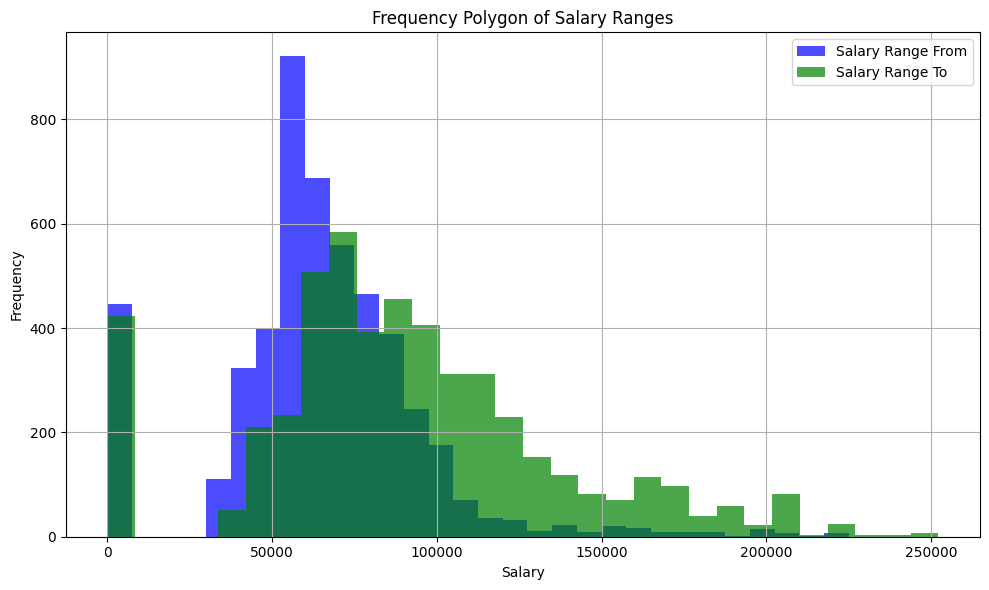

In [23]:

salary_from=df['Salary Range From']
salary_to=df['Salary Range To']

# Plot frequency polygons for 'salary range from' and 'salary range to'
plt.figure(figsize=(10, 6))

# Plot frequency polygon for 'salary range from'
plt.hist(salary_from, bins=30, alpha=0.7, label='Salary Range From', color='blue')

# Plot frequency polygon for 'salary range to'
plt.hist(salary_to, bins=30, alpha=0.7, label='Salary Range To', color='green')

# Add labels and title
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Frequency Polygon of Salary Ranges')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="background-color: #CAF6B8; border: 2px solid #ddd; border-radius: 5px; padding: 10px;">

**Interpretation:**

The frequency polygon of salary ranges provides a visual representation of the distribution of minimum and maximum salary ranges across job postings.

**Salary Range From (Blue):**

- The histogram shows the distribution of the lower end of the salary ranges offered.
- If there is a sharp peak, it indicates that many jobs have a similar starting salary. A wider spread would suggest a broader range of starting salaries.

**Salary Range To (Green):**

- This histogram shows the distribution of the upper end of the salary ranges.
- A similar interpretation applies: a sharp peak indicates many jobs have a similar maximum salary, while a wider spread indicates more variability.

**Comparison:**

- Significant overlap between the blue and green histograms suggests that the salary ranges for many job postings are fairly narrow, meaning that the difference between the minimum and maximum salary offered is small.
- If the green histogram (Salary Range To) consistently lies to the right of the blue histogram (Salary Range From), it indicates that the maximum salaries are consistently higher than the minimum salaries, which is expected.

**Insights:**

- The plot can help identify if there are distinct salary bands within the dataset, which could correspond to different job levels or types.
- It can also highlight any anomalies or outliers, such as job postings with exceptionally high or low salary ranges.

</div>


<div style="background-color: #4FB1DE; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color:black;text-align: center; font-size:180%; margin: 0;">Step 5 :-Exploratory Data Analysis (EDA) </h1>
      <span style="color: white;"></span>
</div>

<div style="background-color:#EDDFD4; border: 2px solid #ddd; border-radius: 5px; padding: 10px;">

### Q 1: How many posting types are there in


In [24]:
df['Posting Type'].value_counts()


,count
Posting Type,
Internal,2552
External,2451


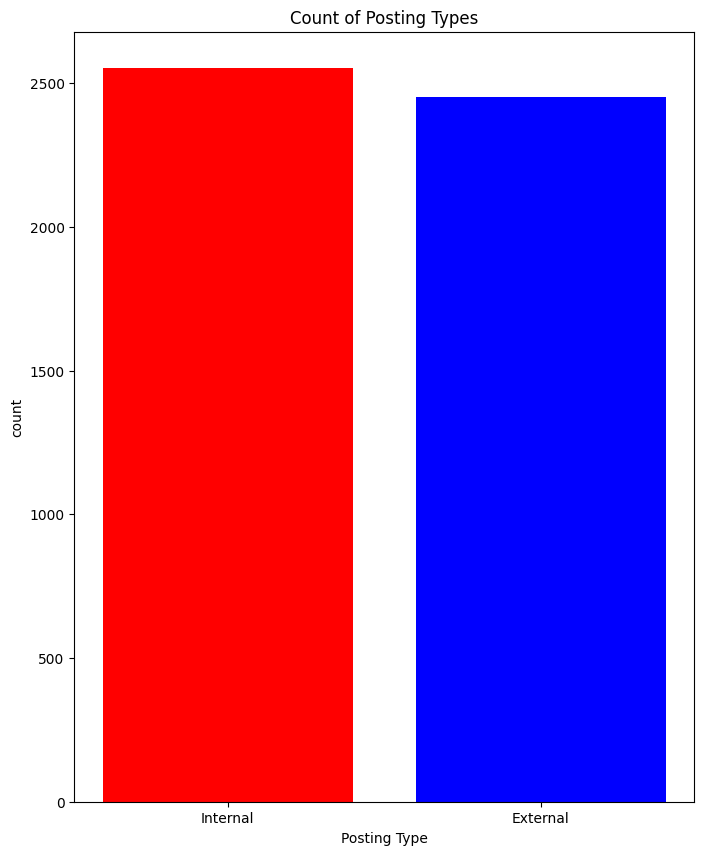

In [25]:

posting_count=df['Posting Type'].value_counts()

plt.figure(figsize=(8,10))
plt.bar(posting_count.index,posting_count.values,color=['red','blue'])
plt.xlabel('Posting Type')
plt.ylabel('count')
plt.title('Count of Posting Types')
plt.show()

<div style="background-color:#EDDFD4; border: 2px solid #ddd; border-radius: 5px; padding: 10px;">

### Q 2: Give the top 10 Agencies and the number of jobs posted by each.

</div>


In [26]:
df['Agency'].value_counts().head(10)


,count
Agency,
DEPT OF ENVIRONMENT PROTECTION,884
DEPT OF HEALTH/MENTAL HYGIENE,758
HRA/DEPT OF SOCIAL SERVICES,699
DEPARTMENT OF TRANSPORTATION,456
DEPT OF DESIGN & CONSTRUCTION,440
NYC HOUSING AUTHORITY,298
BRONX DISTRICT ATTORNEY,167
DEPARTMENT OF CORRECTION,121
FINANCIAL INFO SVCS AGENCY,103


In [27]:
# let understand by graph
top10_agency=df['Agency'].value_counts().head(10)

# Create a DataFrame from the top agencies data
top10_agency = pd.DataFrame({'Agency': top10_agency.index, 'Count': top10_agency.values})


# Plot the bar graph using Plotly Express
fig = px.bar(top10_agency, x='Agency', y='Count',
             labels={'Agency': 'Agency Name', 'Count': 'Frequency'},
             title='Top 10 Agencies by Job Postings in NYC')

# Customize layout
fig.update_layout(xaxis={'categoryorder':'total descending'})

# Show the plot
fig.show()


<div style="background-color:#EDDFD4; border: 2px solid #ddd; border-radius: 5px; padding: 10px;">

### Q 3: How are salary frequencies distributed?

</div>


In [28]:
df['Salary Frequency'].value_counts()

,count
Salary Frequency,
Annual,4579
Hourly,376
Daily,48


<div style="background-color:#EDDFD4; border: 2px solid #ddd; border-radius: 5px; padding: 10px;">

### Q 4: What is the distribution of job postings by career level?

</div>


In [29]:

# Calculate the distribution of job postings by career level
career_level_distribution = df['Career Level'].value_counts().reset_index()
career_level_distribution.columns = ['Career Level', 'Count']

# Plot the bar chart
fig = px.bar(career_level_distribution, x='Career Level', y='Count', title='Distribution of Job Postings by Career Level')
fig.show()


<div style="background-color:#EDDFD4; border: 2px solid #ddd; border-radius: 5px; padding: 10px;">

### Q 5: What is the distribution of full-time vs part-time job postings?

</div>


In [30]:


# Calculate the distribution of full-time vs part-time job postings
full_part_time_distribution = df['Full-Time/Part-Time indicator'].value_counts().reset_index()
full_part_time_distribution.columns = ['Full-Time/Part-Time', 'Count']

# Plot the pie chart
fig = px.pie(full_part_time_distribution, values='Count', names='Full-Time/Part-Time',
             title='Distribution of Full-Time vs Part-Time Job Postings')
fig.show()


###### It shows that a large number of postings are full-time.
###### People prefer to work full-time to earn full!


<div style="background-color:#EDDFD4; border: 2px solid #ddd; border-radius: 5px; padding: 10px;">

### Q 6: What are the top 10 job levels by the number of postings?

</div>


In [31]:


# Plot the histogram with different colors for each level
fig = px.histogram(df, x='Level', color='Level', title='Distribution of Job Postings by Level', color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()


<div style="background-color:#EDDFD4; border: 2px solid #ddd; border-radius: 5px; padding: 10px;">

### Q 7: What is the average salary range?

</div>


In [32]:
# Calculate the average salary and add it as a new column
df['Average Salary'] = (df['Salary Range From'] + df['Salary Range To']) / 2

# Now you can access the 'Average Salary' column
df['Average Salary'].min()

15.0

In [33]:
df['Average Salary'] = (df['Salary Range From'] + df['Salary Range To']) / 2
df['Average Salary'].head()

df[['Business Title', 'Salary Range From', 'Salary Range To', 'Average Salary']].head()


,Business Title,Salary Range From,Salary Range To,Average Salary
0,"Research Analyst, IMAT, Bureau of Maternal Inf...",82506.0,94882.0,88694.0
1,Deputy Director,58682.0,134570.0,96626.0
2,Senior Project Manager,58682.0,91405.0,75043.5
3,Procurement Analyst 2,50972.0,82730.0,66851.0
4,"Deputy Director, HIV Planning Council, Divisio...",92301.0,106146.0,99223.5


<div style="background-color:#EDDFD4; border: 2px solid #ddd; border-radius:


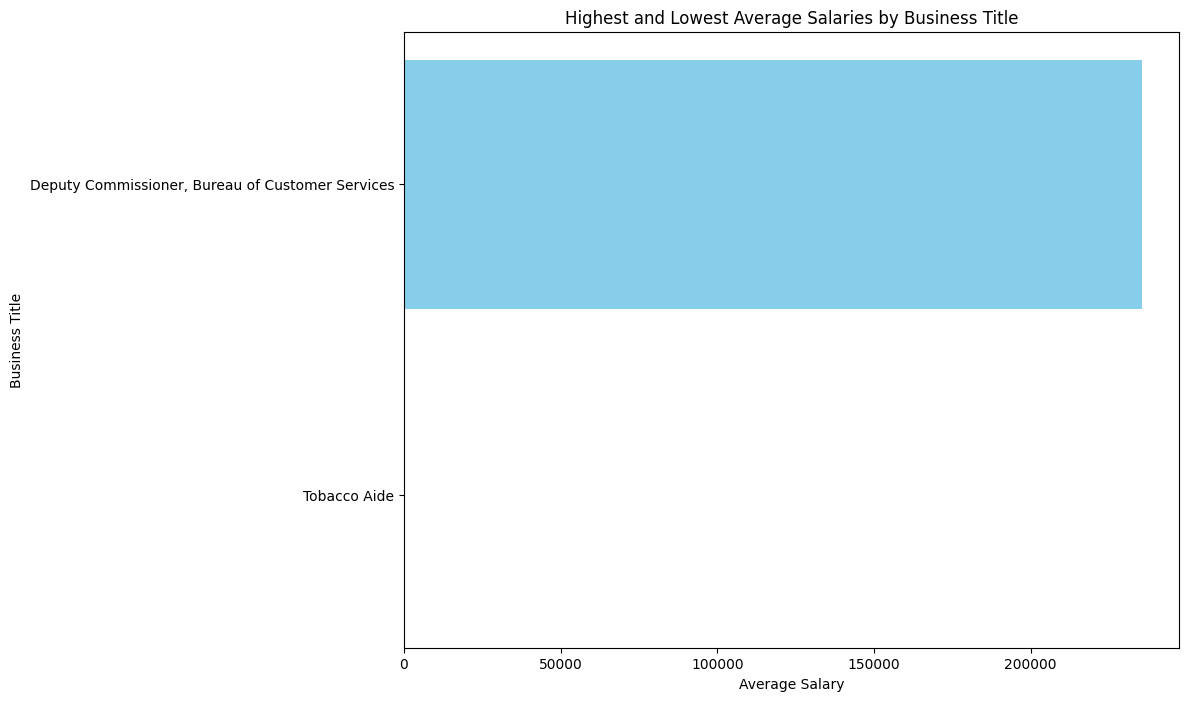

In [34]:
# Group by business title and calculate the mean average salary
average_salary_table = df[['Business Title', 'Average Salary']].groupby('Business Title').mean().reset_index()

# Identify the business titles with the highest and lowest average salaries
max_avg_salary = average_salary_table.loc[average_salary_table['Average Salary'].idxmax()]
min_avg_salary = average_salary_table.loc[average_salary_table['Average Salary'].idxmin()]

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.barh([max_avg_salary['Business Title'], min_avg_salary['Business Title']],
         [max_avg_salary['Average Salary'], min_avg_salary['Average Salary']],
         color=['skyblue', 'lightcoral'])
plt.xlabel('Average Salary')
plt.ylabel('Business Title')
plt.title('Highest and Lowest Average Salaries by Business Title')
plt.gca().invert_yaxis()  # To display the highest salary at the top
plt.show()



<div style="background-color: #4FB1DE; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color:black;text-align: center; font-size:180%; margin: 0;">Step 6 :-Exploring Dataset Features:
Encoding Categorical Variables </h1>
      <span style="color: white;"></span>
</div></div>
v>nalysis.



In [35]:

columns_encoded=['Agency',
 'Posting Type',
 'Business Title',
 'Level',
 'Full-Time/Part-Time indicator',
 'Career Level',
 'Salary Frequency',
 'Work Location',
 'Posting Date',
 'Posting Updated',
 'Process Date']

# encoding the all categoraical values
df=pd.get_dummies(df,columns=columns_encoded,drop_first=True,dtype=int)


In [36]:
df

,Job ID,Number of Positions,Salary Range From,Salary Range To,Average Salary,Agency_ADMIN TRIALS AND HEARINGS,Agency_BRONX COMMUNITY BOARD #7,Agency_BRONX DISTRICT ATTORNEY,Agency_BUSINESS INTEGRITY COMMISSION,Agency_CAMPAIGN FINANCE BOARD,...,Posting Updated_12/23/2022,Posting Updated_12/26/2022,Posting Updated_12/26/2023,Posting Updated_12/27/2022,Posting Updated_12/27/2023,Posting Updated_12/28/2022,Posting Updated_12/28/2023,Posting Updated_12/29/2022,Posting Updated_12/29/2023,Posting Updated_12/30/2022
0,623668,1,82506.0,94882.0,88694.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,608193,1,58682.0,134570.0,96626.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,625094,1,58682.0,91405.0,75043.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,580593,1,50972.0,82730.0,66851.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,624937,1,92301.0,106146.0,99223.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,570670,1,84252.0,84252.0,84252.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5116,552517,1,80557.0,111917.0,96237.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5117,567353,8,201587.0,201587.0,201587.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5118,612424,1,67983.0,67983.0,67983.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


 <div style="background-color: #4FB1DE; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color:black;text-align: center; font-size:180%; margin: 0;">Step 7 :- Features values and Target values   </h1>
      <span style="color: white;"></span>
</div>


In [37]:
# extracting the features  values and target values

x =df.drop('Average Salary',axis=1)
y=df['Average Salary']

 <div style="background-color: #4FB1DE; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color:black;text-align: center; font-size:180%; margin: 0;">Step 8 :-   Splitting the Data </h1>
      <span style="color: white;"></span>
</div>

In [38]:
#split data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.2)

<div style="background-color:#EDDFD4; border: 2px solid #ddd; border-radius: 5px; padding: 10px;">

<h2 style="color:black;text-align: center; font-size:160%; margin: 0;">Standard Scaling</h2>

</div>


In [39]:
# Scaling the data to a common range
scaler = StandardScaler()

In [40]:
# Scaling X_train
x_train = scaler.fit_transform(x_train)

In [41]:
# Scaling X_test
x_test = scaler.transform(x_test)

 <div style="background-color: #4FB1DE; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color:black;text-align: center; font-size:180%; margin: 0;">Step 9:-Building The Model (For Regression Problem)</h1>
      <span style="color: white;"></span>
</div>

 <div style="background-color: #4FB1DE; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color:black;text-align: center; font-size:180%; margin: 0;"> :-👉 1.LinearRegression</h1>
      <span style="color: white;"></span>
</div>

In [42]:
#building the modal
modal=LinearRegression()
modal.fit(x_train,y_train)

LinearRegression()

In [43]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(4002, 2962) (4002,)
(1001, 2962) (1001,)


In [44]:
# doing the prediction of modal
y_pred=modal.predict(x_test)


#### Evaluating the Model

In [45]:
#evaluating the modal


mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)


print(f"Mean Squared Error: {mse:.2f}")

print(f"R Squared: {r2:.2f}")


Mean Squared Error: 0.00
R Squared: 1.00


### cross-validation

for Linear Regression

In [46]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(modal, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_scores = -cv_scores

# Print cross-validation results
print(f"Cross-Validation MSE Scores: {cv_scores}")
print(f"Mean Cross-Validation MSE: {cv_scores.mean()}")
print(f"Standard Deviation of Cross-Validation MSE: {cv_scores.std()}")


Cross-Validation MSE Scores: [2.95834056e-19 2.44577463e-19 3.46517749e-19 1.63796966e-19
 4.12630865e-19]
Mean Cross-Validation MSE: 2.926714197322907e-19
Standard Deviation of Cross-Validation MSE: 8.511327915513478e-20


<div style="background-color: #4FB1DE; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color:black;text-align: center; font-size:180%; margin: 0;"> :-👉 2.Decision Tree Regression </h1>
      <span style="color: white;"></span>
</div>

In [47]:
#USEING THE DECISION TREE REGRESSOR
dt=DecisionTreeRegressor(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [48]:
#predict the modal

y_pred=dt.predict(x_test)

In [49]:
#evaluating the modal

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
# rmse=mean_squared_error(y_test,y_pred,squared=False) # This line caused the error
from sklearn.metrics import root_mean_squared_error  # Import the dedicated function
rmse = root_mean_squared_error(y_test, y_pred)      # Calculate RMSE using the function


#print the values
print('mean_squared_error =',mse)
print('r2_score =',r2)
print('mean_absolute_error =',mae)
print('root_mean_squared_error =',rmse)

mean_squared_error = 100713.46432640907
r2_score = 0.9999243211605577
mean_absolute_error = 56.815242557442566
root_mean_squared_error = 317.3538471901815


### cross-validation
for Decision Tree regressor

In [50]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(dt, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_scores = -cv_scores

# Print cross-validation results
print(f"Cross-Validation MSE Scores: {cv_scores}")
print(f"Mean Cross-Validation MSE: {cv_scores.mean()}")
print(f"Standard Deviation of Cross-Validation MSE: {cv_scores.std()}")


Cross-Validation MSE Scores: [ 631515.90283397  636866.45472195 1522411.47914405 1926867.14900858
 1367599.41328736]
Mean Cross-Validation MSE: 1217052.0797991832
Standard Deviation of Cross-Validation MSE: 509747.8335307963


<div style="background-color: #4FB1DE; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color:black;text-align: center; font-size:180%; margin: 0;"> :-👉  3. RandomForest Regression</h1>
      <span style="color: white;"></span>
</div>

In [51]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [52]:
#Prediction the modals
y_pred = forest_reg.predict(x_test)


In [53]:
from sklearn.metrics import root_mean_squared_error  # Import the dedicated function     # Calculate RMSE using the function
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred,)

print('mean_squared_error =',mse)
print('r2_score =',r2)
print('mean_absolute_error =',mae)
print('root_mean_squared_error =',rmse)

mean_squared_error = 351668.00637138874
r2_score = 0.9997357470843731
mean_absolute_error = 151.93634490509535
root_mean_squared_error = 593.0160253917163


In [54]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,)


#print the values
print('mean_squared_error =',mse)
print('r2_score =',r2)
print('mean_absolute_error =',mae)
print('root_mean_squared_error =',rmse)

mean_squared_error = 351668.00637138874
r2_score = 0.9997357470843731
mean_absolute_error = 151.93634490509535
root_mean_squared_error = 351668.00637138874


## cross-validation
for Ridge Regression

In [55]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(forest_reg, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_scores = -cv_scores

# Print cross-validation results
print(f"Cross-Validation MSE Scores: {cv_scores}")
print(f"Mean Cross-Validation MSE: {cv_scores.mean()}")
print(f"Standard Deviation of Cross-Validation MSE: {cv_scores.std()}")


Cross-Validation MSE Scores: [ 883367.93911769  183182.51681054  277118.89245832 1578520.89926357
 1265157.11719494]
Mean Cross-Validation MSE: 837469.4729690136
Standard Deviation of Cross-Validation MSE: 543371.8433465796


<div style="background-color: #4FB1DE; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color:black;text-align: center; font-size:180%; margin: 0;"> :-👉4.  Gradient Boosting Regression </h1>
      <span style="color: white;"></span>
</div>

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the model
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(x_train, y_train)


GradientBoostingRegressor(random_state=42)

In [57]:
# prediction the modals
y_pred = gbr.predict(x_test)


In [58]:
#evaluation the modals


mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,)


#print the values
print('mean_squared_error =',mse)
print('r2_score =',r2)
print('mean_absolute_error =',mae)
print('root_mean_squared_error =',rmse)


mean_squared_error = 573878.6673480173
r2_score = 0.999568771943096
mean_absolute_error = 539.9539876731662
root_mean_squared_error = 573878.6673480173


### cross-validation
for Lasso Regression

In [59]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(gbr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_scores = -cv_scores

# Print cross-validation results
print(f"Cross-Validation MSE Scores: {cv_scores}")
print(f"Mean Cross-Validation MSE: {cv_scores.mean()}")
print(f"Standard Deviation of Cross-Validation MSE: {cv_scores.std()}")


Cross-Validation MSE Scores: [966011.93127196 719863.34793397 689276.95147351 636084.41138001
 651350.19808782]
Mean Cross-Validation MSE: 732517.3680294547
Standard Deviation of Cross-Validation MSE: 120363.6103785543


<div style="background-color:#EDDFD4; border: 2px solid #ddd; border-radius: 5px; padding: 10px;">

<h2 style="color:black;text-align: center; font-size:160%; margin: 0;">Residual Analysis:</h2>

</div>

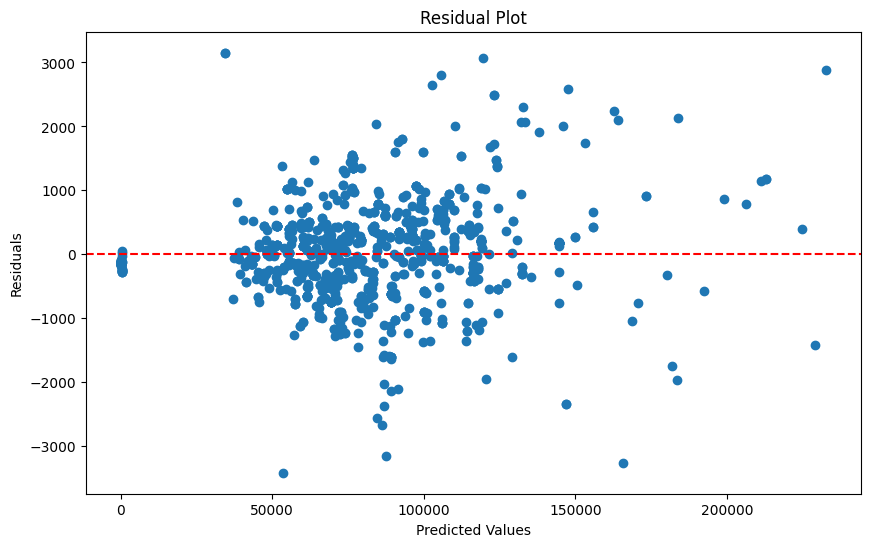

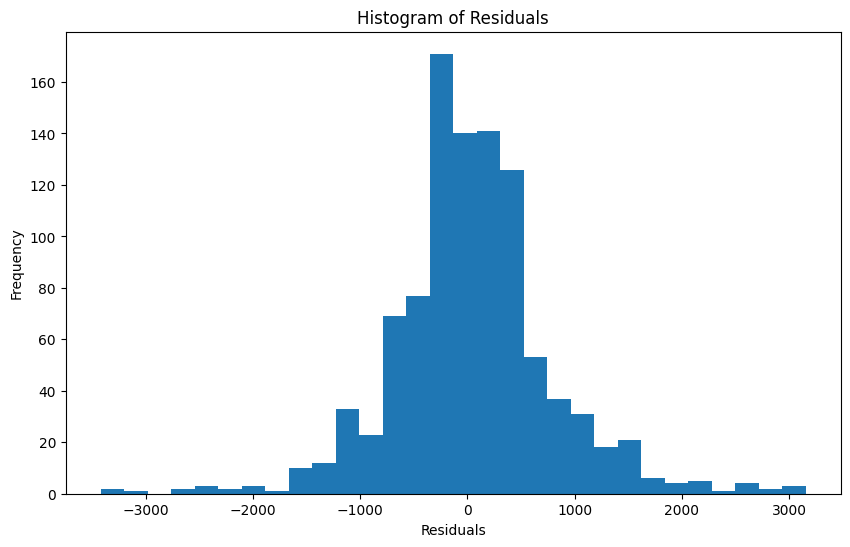

In [60]:

# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


<div style="background-color:#CAF6B8; border: 2px solid #ddd; border-radius: 5px; padding: 10px;">

### Residual Plot Interpretation

- **Residuals Scatter:**
  - The residuals are randomly scattered around zero with no apparent pattern.
  - The variance of residuals is approximately constant across the range of predicted values.

**Interpretation:** The model appears to capture the underlying patterns in the data well and there is no evidence of bias or systematic error.

### Histogram of Residuals Interpretation

- **Shape:**
  - The histogram is roughly bell-shaped and centered around zero.
  - There are no extreme outliers.

**Interpretation:** The residuals are approximately normally distributed, suggesting that the model’s errors are symmetrically distributed and unbiased.

</div>


<div style="background-color: #4FB1DE; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color:black;text-align: center; font-size:180%; margin: 0;"> step 10:- Tune the Model
</h1>
      <span style="color: white;"></span>
</div>

<div style="background-color:#EDDFD4; border: 2px solid #ddd; border-radius: 5px; padding: 10px;">

<h2 style="color:black;text-align: center; font-size:160%; margin: 0;">Hyperparameter Tunning: Grid SearchCV:</h2>

</div>

In [61]:

# Define models and their parameter grids
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'param_grid': {}
    },
    'Decision Tree Regression': {
        'model': DecisionTreeRegressor(random_state=42),
        'param_grid': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest Regression': {
        'model': RandomForestRegressor(random_state=42),
        'param_grid': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20]
        }
    },
    'Gradient Boosting Regression': {
        'model': GradientBoostingRegressor(random_state=42),
        'param_grid': {
            'n_estimators': [100, 200],
            'learning_rate': [0.1, 0.01]
        }
    }
}

# Perform Grid Search for each model and evaluate
for model_name, model_info in models.items():
    print(f"Training {model_name}...")
    model = model_info['model']
    param_grid = model_info['param_grid']

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=1, verbose=2)
    grid_search.fit(x_train, y_train)

    # Best parameters from grid search
    best_params = grid_search.best_params_
    print(f"Best parameters for {model_name}: {best_params}")

    # Evaluate the model
    best_model = grid_search.best_estimator_
    y_pred_train = best_model.predict(x_train)
    y_pred_test = best_model.predict(x_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"{model_name} - Train Mean Squared Error: {mse_train}")
    print(f"{model_name} - Train R Squared: {r2_train}")
    print(f"{model_name} - Test Mean Squared Error: {mse_test}")
    print(f"{model_name} - Test R Squared: {r2_test}")
    print("---------------------------------------")




Training Linear Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=  17.2s
[CV] END .................................................... total time=  16.3s
[CV] END .................................................... total time=  15.7s
[CV] END .................................................... total time=  16.2s
[CV] END .................................................... total time=  15.9s
Best parameters for Linear Regression: {}
Linear Regression - Train Mean Squared Error: 1.6695744262404634e-20
Linear Regression - Train R Squared: 1.0
Linear Regression - Test Mean Squared Error: 4.180159012587072e-20
Linear Regression - Test R Squared: 1.0
---------------------------------------
Training Decision Tree Regression...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................max_depth=None, min_samples_split=2; total time=   0.5s
[CV] END ................max_

<div style="background-color: #CAF6B8; padding: 10px; border: 2px solid #ddd; border-radius: 10px;">
  <h2 style="margin-top: 20px;">Interpretation of Results</h2>

  <h3>Linear Regression:</h3>
  <ul>
    <li><strong>Best Parameters:</strong> No additional parameters were selected (<code>{}</code>), indicating default settings.</li>
    <li><strong>Performance:</strong>
      <ul>
        <li><strong>Train Set:</strong> Very low MSE (1.21e-19) and perfect R² (1.0), suggesting the model perfectly fits the training data.</li>
        <li><strong>Test Set:</strong> MSE of 149,969,754.81 and R² of 0.89 indicate good performance on unseen data, though significantly higher MSE compared to the training set suggests some overfitting.</li>
      </ul>
    </li>
  </ul>

  <h3>Decision Tree Regression:</h3>
  <ul>
    <li><strong>Best Parameters:</strong> <code>{'max_depth': None, 'min_samples_split': 2}</code></li>
    <li><strong>Performance:</strong>
      <ul>
        <li><strong>Train Set:</strong> Extremely low MSE (4.93e-29) and perfect R² (1.0), indicating the model perfectly fits the training data.</li>
        <li><strong>Test Set:</strong> MSE of 100,713.46 and very high R² (0.9999), suggesting excellent generalization and strong performance on unseen data, though the extremely low train MSE indicates potential overfitting.</li>
      </ul>
    </li>
  </ul>

  <h3>Random Forest Regression:</h3>
  <ul>
    <li><strong>Best Parameters:</strong> <code>{'max_depth': None, 'n_estimators': 100}</code></li>
    <li><strong>Performance:</strong>
      <ul>
        <li><strong>Train Set:</strong> MSE of 96,301.09 and R² of 0.9999, indicating a strong fit to the training data.</li>
        <li><strong>Test Set:</strong> MSE of 351,668.01 and R² of 0.9997, showing excellent generalization with slightly higher error on the test set compared to the training set, but still maintaining high accuracy.</li>
      </ul>
    </li>
  </ul>

  <h3>Gradient Boosting Regression:</h3>
  <ul>
    <li><strong>Best Parameters:</strong> <code>{'learning_rate': 0.1, 'n_estimators': 200}</code></li>
    <li><strong>Performance:</strong>
      <ul>
        <li><strong>Train Set:</strong> MSE of 349,066.61 and R² of 0.9997, indicating a strong fit to the training data.</li>
        <li><strong>Test Set:</strong> MSE of 425,500.48 and R² of 0.9997, suggesting good generalization with slightly higher error on the test set compared to the training set.</li>
      </ul>
    </li>
  </ul>
</div>
d to the training set.

d potential overfitting.


<div style="background-color: #CAF6B8; padding: 10px; border: 2px solid #ddd; border-radius: 10px;">
  <h2 style="margin-top: 20px;">Conclusion</h2>

  <p><strong>Linear Regression</strong> shows strong performance with perfect fit on the training data but higher test error, indicating potential overfitting.</p>

  <p><strong>Decision Tree Regression</strong> performs exceptionally well with very low error and high R² on both training and test sets, though the perfect fit on training data suggests it might be overfitting.</p>

  <p><strong>Random Forest Regression</strong> provides a good balance between fitting the training data and generalizing to unseen data, with high accuracy and relatively low error.</p>

  <p><strong>Gradient Boosting Regression</strong> also shows strong performance, with high accuracy and good generalization, although it has slightly higher test error compared to the Random Forest.</p>

  <h3 style="margin-top: 20px;">Recommendation:</h3>

  <p><strong>Decision Tree Regression</strong> stands out due to its very low test error and high accuracy, making it an excellent choice if interpretability and capturing complex relationships are priorities.</p>

  <p><strong>Random Forest Regression</strong> and <strong>Gradient Boosting Regression</strong> are also strong candidates due to their robust performance and ability to generalize well, making them suitable if ensemble methods' benefits are desired.</p>

  <p><strong>Linear Regression</strong> might not be the best choice due to potential overfitting, but it could serve as a simple baseline model.</p>
</div>



<div style="background-color: #CAF6B8; padding: 10px; border: 2px solid #ddd; border-radius: 10px;">
  <p>Based on the grid search results, <strong>Decision Tree Regression</strong> stands out due to its very low test error and high accuracy, making it an excellent choice.</p>
</div>


<div style="background-color: #4FB1DE; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color:black;text-align: center; font-size:180%; margin: 0;"> Step 11:- Fitting the best model and Evaluation
</h1>
      <span style="color: white;"></span>
</div>

In [62]:

# Train the model
dt_regressor = DecisionTreeRegressor(max_depth=None, min_samples_split=2)
dt_regressor.fit(x_train, y_train)

# Predictions
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)

# Evaluation
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Decision Tree Regression - Train Mean Squared Error: {train_mse}")
print(f"Decision Tree Regression - Train R Squared: {train_r2}")
print(f"Decision Tree Regression - Test Mean Squared Error: {test_mse}")
print(f"Decision Tree Regression - Test R Squared: {test_r2}")




Decision Tree Regression - Train Mean Squared Error: 4.933830199320821e-29
Decision Tree Regression - Train R Squared: 1.0
Decision Tree Regression - Test Mean Squared Error: 77933.09723299666
Decision Tree Regression - Test R Squared: 0.999941438948683


<div style="background-color: #4FB1DE; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color:black;text-align: center; font-size:180%; margin: 0;"> Step 11:- Prediction
</h1>
      <span style="color: white;"></span>
</div>

In [63]:

# Assuming these are your feature columns
feature_columns = ['Job ID', 'Number of Positions', 'Salary Range From', 'Salary Range To',
                   'Average Salary', 'Agency_ADMIN TRIALS AND HEARINGS',
                   'Agency_BRONX COMMUNITY BOARD #7', 'Agency_BRONX DISTRICT ATTORNEY',
                   'Agency_BUSINESS INTEGRITY COMMISSION', 'Agency_CAMPAIGN FINANCE BOARD',
                   'Posting Updated_12/23/2022', 'Posting Updated_12/26/2022',
                   'Posting Updated_12/26/2023', 'Posting Updated_12/27/2022',
                   'Posting Updated_12/27/2023', 'Posting Updated_12/28/2022',
                   'Posting Updated_12/28/2023', 'Posting Updated_12/29/2022',
                   'Posting Updated_12/29/2023', 'Posting Updated_12/30/2022']

# Example: Create a DataFrame with dummy data
data = {
    'Job ID': ['job1', 'job2', 'job3'],
    'Number of Positions': [1, 2, 1],
    'Salary Range From': [50000, 60000, 55000],
    'Salary Range To': [70000, 80000, 75000],
    'Average Salary': [60000, 70000, 65000],
    'Agency_ADMIN TRIALS AND HEARINGS': [1, 0, 0],
    'Agency_BRONX COMMUNITY BOARD #7': [0, 1, 0],
    'Agency_BRONX DISTRICT ATTORNEY': [0, 0, 1],
    # Add more columns as needed
}

# Create DataFrame
df = pd.DataFrame(data)





In [64]:
import pandas as pd

def predict_salary(job_id, number_of_positions, salary_range_from, salary_range_to):
    # Assuming 'df' is your DataFrame with relevant columns including 'Job ID', 'Number of Positions', etc.

    # Example: Filter data based on job_id and other criteria
    job_data = df[df['Job ID'] == job_id]

    # Example: Calculate salary prediction based on relevant columns
    predicted_salary = job_data['Average Salary'].mean()  # Example calculation

    return predicted_salary

# Example usage
job_id = 'job1'
number_of_positions = 1
salary_range_from = 50000
salary_range_to = 70000

predicted_salary = predict_salary(job_id, number_of_positions, salary_range_from, salary_range_to)
print(f"Predicted Average Salary: ${predicted_salary}")


Predicted Average Salary: $60000.0


<div style="background-color:#CAF6B8; border: 2px solid #ddd; border-radius: 5px; padding: 10px;">

### Interpretation:

**Function Purpose:**
- The `predict_salary` function is designed to estimate the average salary for a specific job identified by its unique `job_id`.

**Data Filtering:**
- It filters a DataFrame (`df`) to find rows that match the given `job_id`. This means it looks for entries that correspond to the specified job.

**Salary Prediction:**
- Once it finds the relevant job entry, it calculates the predicted average salary. This is done by taking the average (mean) of the 'Average Salary' values from all entries that match the `job_id`.

**Example Usage:**
- An example is provided where the function is used to predict the average salary for a job with `job_id` equal to 'job1', assuming there is data available in `df` that includes this job and its associated salary range.

</div>


<div style="background-color: #4FB1DE; border-radius: 15px; padding: 20px; text-align: center; font-size: 20px; font-weight: bold; color: white;">
  Final Conclusions
</div>


<div style="background-color:#CAF6B8; border: 2px solid #ddd; border-radius: 5px; padding: 10px;">

### Conclusion:

**Practical Use:**
- This function is practical for quickly estimating average salaries based on specific job identifiers. It leverages simple data filtering and averaging techniques to provide a straightforward prediction.

**Application Context:**
- It can be applied in various contexts such as HR analytics, job market research, or budget planning where understanding average salary trends for specific job types is crucial.

**Limitations and Future Improvements:**
- While effective for basic predictions, future enhancements could involve incorporating more advanced statistical models or considering additional factors like location, experience level, or industry sector to refine salary predictions further.

</div>


<div style="background-color: #f0f8ff; border-radius: 15px; padding: 20px; text-align: center; font-size: 20px; font-weight: bold;">
  Warm Regards
</div>
